In [46]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = True
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

<h1>Churn: Using recency to predict risk of churn</h1>

<div id='Contents' name='Contents'><br></div>

<h3>Contents</h3>

<ul>
    <li><a href='#Brief'>Brief</a></li>
    <li><a href='#Data_exploration'>Data exploration</a></li>
    <li><a href='#Methodology'>Methodology</a></li>
    <li><a href='#Analysis'>Analysis</a></li>
    <ul>
        <li><a href='#Assessing_the_model'>Assessing the model</a></li>
        <li><a href='#Predictions'>Predictions</a></li>
    </ul>
    <li><a href='#Insights'>Insights</a></li>
</ul>

<div id='Brief' name='Brief'><br></div>

<hr>

<br>

<h3><a href='#Contents'>Brief</a></h3>

<ul>
    <li><b><code></code></b> - </li>
    <br>
    <li><b><code></code></b> - </li>
    <br>
    <li><b><code></code></b> - </li>
</ul>

<div id='Data_exploration' name='Data_exploration'><br></div>

<hr>

<br>

<h3><a href='#Contents'>Data exploration</a></h3>


<ul>
    <li><b><code></code></b> - </li>
    <br>
    <li><b><code></code></b> - </li>
    <br>
    <li><b><code></code></b> - </li>
</ul>

In [44]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# style
!pip install ipynb | grep -v 'already satisfied'
from ipynb.fs.full.Style_Sheet import *
plt.style.use(style_use)
plt.rcParams.update(style_params)


# data
file_path = r'churn.csv'
df = pd.read_csv(file_path)

# show
df.head(10)

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640
5,0,0.493400,-0.770003
6,0,-0.303312,-0.797232
7,0,0.206223,1.146728
8,0,0.130153,1.704503
9,0,0.399325,-0.515869


<div id='Methodology' name='Methodology'><br></div>

<hr>

<br>

<h3><a href='#Contents'>Methodology</a></h3>

<ul>
    <li><b><code>Logistic regression</code></b> - Logistic regression is the appropriate method to use when analysing a binary outcome (<code>0/1</code>, <code>Y/N</code>, <code>True/False</code>) which is the case with churn, e.g. how does a customer's recency (<code>time_since_last_purchase</code>) impact whether or not they have churned (<code>has_churned</code>)?</li>
    <br>
    <li><b><code>statsmodels</code></b> - The <code>statsmodel</code> package is available to build logistic regression. This package is preferred for extracting insights when analysing historical data. Using <code>from statsmodels.formula.api import logit</code>, response and explanatory variables are fitted from the data. (Alternatively, <code>scikit-learn</code> is available when optimising for predictions and machine learnning)</li>
    <br>
    <li><b><code>logit</code></b> - Based on the explanatory variable(s) in the dataset, <code>time_since_last_purchase</code> in this instance, logistic regression will assign a probability between 0 and 1 that a customer will churn. Probabilities can be rounded to 0 or 1 to produce a most likely outcome and returned to the dataset. The <code>reg_log</code> function is built to contain the elements necessary for a comprehensive analysis and ensure ease-of-use.</li>
    <br>
    <li><b><code>sns.regplot</code></b> - The <code>seaborn</code> package contains <code>regplot</code> which is a primary visualisation for all regression, producing scatter points and a linear relationship. The output is modified to show logistic relationships using <code>logistic=True</code>. Additionally <code>sns.scatter</code> is used to overlay the regplot with binary reulsts of the model. Visualisations are contained in functions.</li>
</ul>

<br>

In [41]:
from statsmodels.formula.api import logit
from statsmodels.graphics.mosaicplot import mosaic

# log reg function
def reg_log(y, x, data):
    
    # variables
    mdl_v = f'{y} ~ {x}'
    
    # model
    mdl = logit(mdl_v, data=data).fit(disp=0)
    
    # params
    mdl_params = mdl.params
    mdl_intercept = mdl_params[0]
    mdl_slope = mdl_params[1]
    mdl_eq = f'{y} = {mdl_intercept} + {mdl_slope} * {x}'
    
    # predictions
    data['mdl_prediction'] = mdl.predict(data[x])
    data['mdl_prediction_outcome'] = np.round(mdl.predict(data[x]))
    
    # fit
    mdl_conf_matrix = mdl.pred_table()
    mdl_accuracy = (mdl_conf_matrix[0,0] + mdl_conf_matrix[1,1]) / len(data)
    mdl_sensitivity = mdl_conf_matrix[1,1] / (mdl_conf_matrix[1,0] + mdl_conf_matrix[1,1])
    mdl_specificity = mdl_conf_matrix[0,0] / (mdl_conf_matrix[0,0] + mdl_conf_matrix[0,1])
    mdl_fit = pd.DataFrame({'Fit':['Accuracy','Sensitivity','Specificity'],
                            'Score':[mdl_accuracy, mdl_sensitivity, mdl_specificity]})
    
    # output
    return data, mdl, mdl_params, mdl_eq, mdl_conf_matrix, mdl_fit


# log reg plot
def viz_reg_log(data, y, x, ax, title):
    sns.regplot(ax=ax, data=data, x=x, y=y, ci=None, logistic=True, color=color[0], scatter_kws={'alpha':0.025})
    ax.set_xlim(round(min(data[x]) - (max(data[x])/5),1), round(max(data[x]) + (max(data[x])/5),1))
    ax.set_ylim(round(min(data[y]) - (max(data[y])/5),1), round(max(data[y]) + (max(data[y])/5),1))   
    ax.set_title(title)
    return ax

# viz scatter
def viz_scatter(data, y, x, ax):
    sns.scatterplot(data=data, y=y, x=x, ax=ax, color=color[1])
    ax.set_xlim(round(min(data[x]) - (max(data[x])/5),1), round(max(data[x]) + (max(data[x])/5),1))
    ax.set_ylim(round(min(data[y]) - (max(data[y])/5),1), round(max(data[y]) + (max(data[y])/5),1))   
    return ax

def viz_line(data, y, x, ax, title):
    sns.lineplot(data=data, y=y, x=x, ax=ax, color=color[0])
    ax.set_xlim(round(min(data[x]) - (max(data[x])/5),1), round(max(data[x]) + (max(data[x])/5),1))
    ax.set_ylim(round(min(data[y]) - (max(data[y])/5),1), round(max(data[y]) + (max(data[y])/5),1))
    ax.set_title(title)
    return ax

In [42]:
import inspect as i
import sys
sys.stdout.write(i.getsource(reg_log))

def reg_log(y, x, data):
    
    # variables
    mdl_v = f'{y} ~ {x}'
    
    # model
    mdl = logit(mdl_v, data=data).fit(disp=0)
    
    # params
    mdl_params = mdl.params
    mdl_intercept = mdl_params[0]
    mdl_slope = mdl_params[1]
    mdl_eq = f'{y} = {mdl_intercept} + {mdl_slope} * {x}'
    
    # predictions
    data['mdl_prediction'] = mdl.predict(data[x])
    data['mdl_prediction_outcome'] = np.round(mdl.predict(data[x]))
    
    # fit
    mdl_conf_matrix = mdl.pred_table()
    mdl_accuracy = (mdl_conf_matrix[0,0] + mdl_conf_matrix[1,1]) / len(data)
    mdl_sensitivity = mdl_conf_matrix[1,1] / (mdl_conf_matrix[1,0] + mdl_conf_matrix[1,1])
    mdl_specificity = mdl_conf_matrix[0,0] / (mdl_conf_matrix[0,0] + mdl_conf_matrix[0,1])
    mdl_fit = pd.DataFrame({'Fit':['Accuracy','Sensitivity','Specificity'],
                            'Score':[mdl_accuracy, mdl_sensitivity, mdl_specificity]})
    
    # output
    return data, mdl, mdl_params, mdl_eq, mdl_conf_matrix, mdl_

<div id='Analysis' name='Analysis'><br></div>

<hr>

<br>

<h3><a href='#Contents'>Analysis</a></h3>

<ul>
    <li><b><code></code></b> - </li>
    <br>
    <li><b><code></code></b> - </li>
    <br>
    <li><b><code></code></b> - </li>
</ul>

In [36]:
# inputs
data = df
y = 'has_churned'
y_prediction = 'mdl_prediction_outcome'
x = 'time_since_last_purchase'

# run model
mdl_output = reg_log(y, x, data)

# store outputs
mdl_df = mdl_output[0]
mdl = mdl_output[1]

# show
mdl_df.head(10)

,has_churned,time_since_first_purchase,time_since_last_purchase,mdl_prediction,mdl_prediction_outcome
0,0,-1.089221,-0.721322,0.442947,0.0
1,0,1.182983,3.634435,0.719791,1.0
2,0,-0.846156,-0.427582,0.462538,0.0
3,0,0.086942,-0.535672,0.455312,0.0
4,0,-1.166642,-0.672640,0.446183,0.0
5,0,0.493400,-0.770003,0.439716,0.0
6,0,-0.303312,-0.797232,0.437911,0.0
7,0,0.206223,1.146728,0.568000,1.0
8,0,0.130153,1.704503,0.604406,1.0
9,0,0.399325,-0.515869,0.456634,0.0


<div id='Assessing_the_model' name='Assessing_the_model'><br></div>

<hr>

<br>

<h3><a href='#Contents'>Assessing the model</a></h3>

<ul>
    <li><code>accuracy</code>: % of correct predictions.</li>
    <li><code>sensitivity</code>: % of actual True population predicted correctly.</li>
    <li><code>specificity</code>: % of actual False population predicted correctly.</li>
</ul>

           Fit  Score
0     Accuracy  0.575
1  Sensitivity  0.445
2  Specificity  0.705


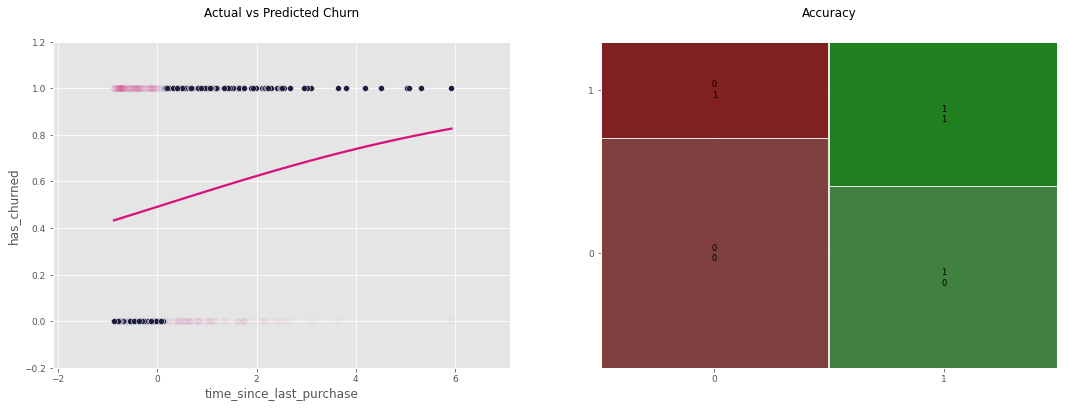

In [29]:
# confusion matrix
mdl_conf_matrix = mdl_output[4]
mdl_fit = mdl_output[5]

# fig
fig, [ax_1, ax_2] = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# viz
viz_reg_log(data, y, x, ax_1, 'Actual vs Predicted Churn')
viz_scatter(data, y_prediction, x, ax_1)
mosaic(mdl_conf_matrix, ax=ax_2, title='Accuracy')

# show
print(mdl_fit)
plt.show()

<div id='Predictions' name='Predictions'><br></div>

<hr>

<br>

<h3><a href='#Contents'>Predictions</a></h3>

<ul>
    <li><code>mdl.predict</code>: % chance of churn based on model.</li>
    <li><code>most_likely_outcome</code>: rounds predicted value to 0 or 1.</li>
    <li><code>odds_ratio</code>: probability of churn vs probability of non-churn (<code>prediction/(1-prediction)</code>).</li>
</ul>

In [86]:
# sample data
df_predictions = pd.DataFrame({'time_since_last_purchase':np.arange(-1, 6.25, 0.25)})

# most liekly outcome
df_predictions['has_churned'] = mdl.predict(df_predictions['time_since_last_purchase'])
df_predictions['most_likely_outcome'] = round(mdl.predict(df_predictions['time_since_last_purchase']))

# odds ratio
df_predictions['odds_ratio'] = df_predictions['has_churned'] / (1 - df_predictions['has_churned'])
df_predictions['odds_ratio_log'] = np.log(df_predictions['odds_ratio'])

# show
df_predictions.head()

,time_since_last_purchase,has_churned,most_likely_outcome,odds_ratio,odds_ratio_log
0,-1.00,0.424523,0.0,0.737688,-0.304234
1,-0.75,0.441043,0.0,0.789046,-0.236931
2,-0.50,0.457695,0.0,0.843980,-0.169627
3,-0.25,0.474441,0.0,0.902738,-0.102323
4,0.00,0.491246,0.0,0.965587,-0.035019


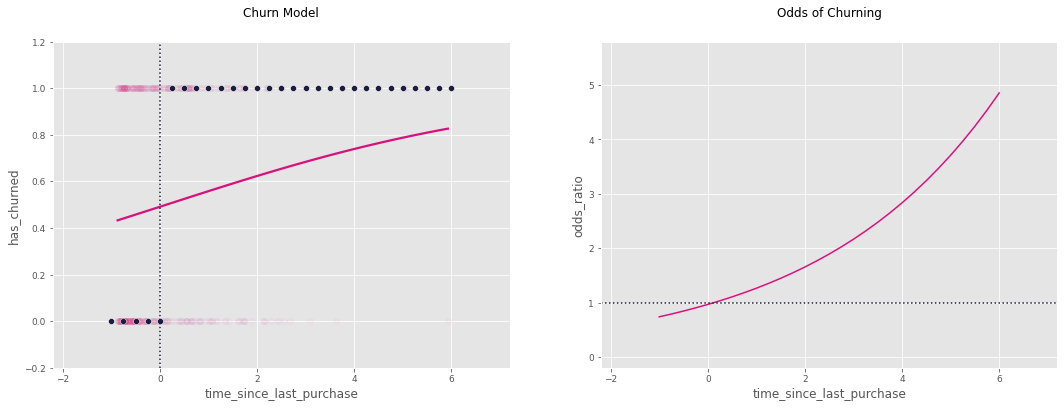

In [173]:
# fig
fig, [ax_1, ax_2] = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# viz
viz_reg_log(df, 'has_churned', 'time_since_last_purchase', ax_1, 'Churn Model')
viz_scatter(df_predictions, 'most_likely_outcome', 'time_since_last_purchase', ax_1)
ax_1.axvline(x=0, linestyle='dotted', color=color[1])
viz_line(df_predictions, 'odds_ratio', 'time_since_last_purchase', ax_2, 'Odds of Churning')
ax_2.axhline(y=1, linestyle='dotted', color=color[1])

# show
plt.show()

<div id='Insights' name='Insights'><br></div>

<hr>

<br>

<h3><a href='#Contents'>Insights</a></h3>

<ul>
    <li>Recency can predict churn with <code>~60% accuracy</code>. This is a good starting point to understand behaviour, but more data points will be beneficial.</li>
    <br>
    <li>Customers with <code>time_since_last_purchase > 0</code>  are at risk of churn - need to discourage customers from reaching this point.</li>
    <br>
    <li><code>Odds curve</code> is exponetial, i.e. every additional day of idleness adds increased risk of churn (customers with longer idle times are up to <code>x5 more likely to churn</code> and are difficult to re-engage).</li>
</ul>